In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np


In [2]:
DATASET_DIR = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp4\train"

In [3]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 50
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


## making test dataset

In [4]:
new_base_dir = "F:/data for final project sem3/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/exp4/test"

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(new_base_dir,
                                                   target_size=(IMG_H, IMG_W),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 624 images belonging to 2 classes.


In [6]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/50
60/60 [==============================] - 14s 158ms/step - loss: 0.6170 - accuracy: 0.7167 - val_loss: 0.6096 - val_accuracy: 0.6833
Epoch 2/50
60/60 [==============================] - 10s 160ms/step - loss: 0.3752 - accuracy: 0.8479 - val_loss: 0.6780 - val_accuracy: 0.7417
Epoch 3/50
60/60 [==============================] - 9s 156ms/step - loss: 0.3373 - accuracy: 0.8667 - val_loss: 0.3772 - val_accuracy: 0.8750
Epoch 4/50
60/60 [==============================] - 9s 154ms/step - loss: 0.2717 - accuracy: 0.8938 - val_loss: 0.3969 - val_accuracy: 0.8500
Epoch 5/50
60/60 [==============================] - 9s 152ms/step - loss: 0.2648 - accuracy: 0.9146 - val_loss: 0.4837 - val_accuracy: 0.8500
Epoch 6/50
60/60 [==============================] - 9s 157ms/step - loss: 0.2146 - accuracy: 0.9208 - val_loss: 0.3226 - val_accuracy: 0.8833
Epoch 7/50
60/60 [==============================] - 9s 155ms/step - loss: 0.1939 - accuracy: 0.9354 - val_loss: 0.3903 - val_accuracy: 0.8583
Epoc

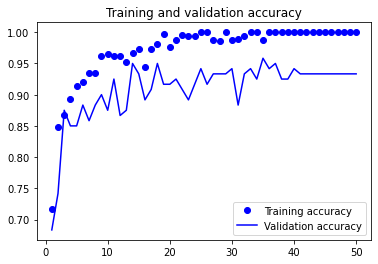

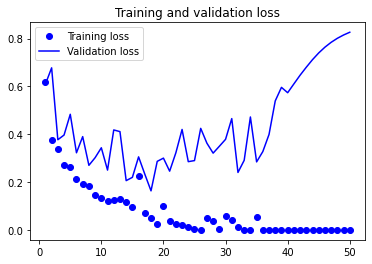

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## adding data augmentation

In [10]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [11]:
inputs = keras.Input(shape=INPUT_SHAPE)

x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/50
60/60 [==============================] - 11s 161ms/step - loss: 0.7310 - accuracy: 0.4896 - val_loss: 0.6857 - val_accuracy: 0.5083
Epoch 2/50
60/60 [==============================] - 10s 168ms/step - loss: 1.3931 - accuracy: 0.5437 - val_loss: 1.7157 - val_accuracy: 0.5000
Epoch 3/50
60/60 [==============================] - 10s 161ms/step - loss: 1.5078 - accuracy: 0.5000 - val_loss: 1.2990 - val_accuracy: 0.5000
Epoch 4/50
60/60 [==============================] - 9s 155ms/step - loss: 1.1227 - accuracy: 0.5000 - val_loss: 0.9596 - val_accuracy: 0.5000
Epoch 5/50
60/60 [==============================] - 9s 155ms/step - loss: 0.8034 - accuracy: 0.5125 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 6/50
60/60 [==============================] - 10s 162ms/step - loss: 0.7048 - accuracy: 0.4875 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 7/50
60/60 [==============================] - 9s 156ms/step - loss: 0.6939 - accuracy: 0.5167 - val_loss: 0.6937 - val_accuracy: 0.5000
Ep

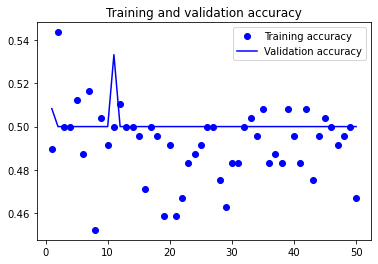

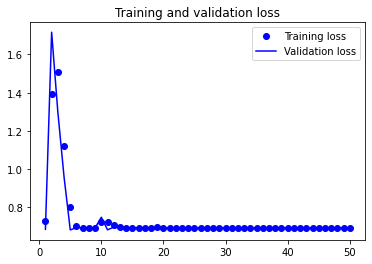

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## removing data augmentation and adding dropout layer

In [16]:
inputs = keras.Input(shape=INPUT_SHAPE)

x = inputs
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="sigmoid")(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [17]:
history = model3.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/50
60/60 [==============================] - 11s 171ms/step - loss: 0.6858 - accuracy: 0.5750 - val_loss: 0.7175 - val_accuracy: 0.5000
Epoch 2/50
60/60 [==============================] - 10s 163ms/step - loss: 0.4826 - accuracy: 0.7708 - val_loss: 0.5216 - val_accuracy: 0.8083
Epoch 3/50
60/60 [==============================] - 10s 163ms/step - loss: 0.4032 - accuracy: 0.8292 - val_loss: 0.4781 - val_accuracy: 0.8000
Epoch 4/50
60/60 [==============================] - 10s 158ms/step - loss: 0.3612 - accuracy: 0.8604 - val_loss: 0.4184 - val_accuracy: 0.8417
Epoch 5/50
60/60 [==============================] - 10s 158ms/step - loss: 0.3128 - accuracy: 0.8792 - val_loss: 0.5850 - val_accuracy: 0.7583
Epoch 6/50
60/60 [==============================] - 10s 157ms/step - loss: 0.2762 - accuracy: 0.9000 - val_loss: 0.3445 - val_accuracy: 0.8333
Epoch 7/50
60/60 [==============================] - 9s 157ms/step - loss: 0.1967 - accuracy: 0.9375 - val_loss: 0.3168 - val_accuracy: 0.8833


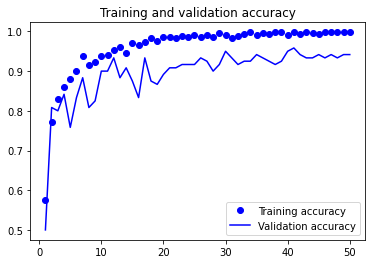

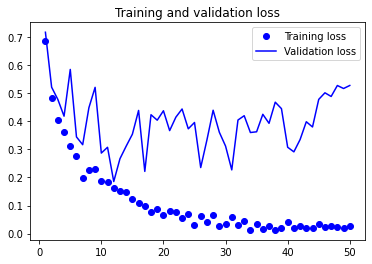

In [18]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [19]:
# model3.save(r'F:\data for final project sem3\results\overfit model\remove aug add dropout')

INFO:tensorflow:Assets written to: F:\data for final project sem3\results\overfit model\remove aug add dropout\assets


In [29]:
test_model = model3
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

78/78 [==============================] - 9s 78ms/step - loss: 1.9871 - accuracy: 0.7869
Test accuracy: 0.787


## model 4 proper fine tune

In [85]:
# training our simple model with the frozen conv base

In [79]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE)

In [81]:
inputs = keras.Input(INPUT_SHAPE)
x = inputs
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model4 = keras.Model(inputs, outputs)
model4.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [82]:
# freezing layers
conv_base.trainable = False

In [83]:
model4.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
               metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_new.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model4.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/50
60/60 [==============================] - 11s 163ms/step - loss: 1.6092 - accuracy: 0.4917 - val_loss: 0.7258 - val_accuracy: 0.5000
Epoch 2/50
60/60 [==============================] - 10s 159ms/step - loss: 1.5023 - accuracy: 0.4812 - val_loss: 0.6817 - val_accuracy: 0.5083
Epoch 3/50
60/60 [==============================] - 10s 159ms/step - loss: 1.3998 - accuracy: 0.5104 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/50
60/60 [==============================] - 10s 170ms/step - loss: 1.2421 - accuracy: 0.5292 - val_loss: 0.6810 - val_accuracy: 0.5000
Epoch 5/50
60/60 [==============================] - 10s 171ms/step - loss: 1.4383 - accuracy: 0.4979 - val_loss: 0.6727 - val_accuracy: 0.5417
Epoch 6/50
60/60 [==============================] - 10s 162ms/step - loss: 1.4296 - accuracy: 0.4354 - val_loss: 0.6713 - val_accuracy: 0.5167
Epoch 7/50
60/60 [==============================] - 10s 160ms/step - loss: 1.3838 - accuracy: 0.5083 - val_loss: 0.6661 - val_accuracy: 0.6750

In [86]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [87]:
model4.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
               metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_model4_new2.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model4.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/50
60/60 [==============================] - 11s 166ms/step - loss: 0.7507 - accuracy: 0.5896 - val_loss: 0.6161 - val_accuracy: 0.5917
Epoch 2/50
60/60 [==============================] - 10s 160ms/step - loss: 0.6111 - accuracy: 0.6812 - val_loss: 0.5685 - val_accuracy: 0.7083
Epoch 3/50
60/60 [==============================] - 10s 163ms/step - loss: 0.6130 - accuracy: 0.6896 - val_loss: 0.4750 - val_accuracy: 0.8583
Epoch 4/50
60/60 [==============================] - 10s 161ms/step - loss: 0.6005 - accuracy: 0.6792 - val_loss: 0.8585 - val_accuracy: 0.5250
Epoch 5/50
60/60 [==============================] - 10s 163ms/step - loss: 0.5829 - accuracy: 0.6938 - val_loss: 0.4481 - val_accuracy: 0.7500
Epoch 6/50
60/60 [==============================] - 10s 162ms/step - loss: 0.5595 - accuracy: 0.7250 - val_loss: 0.8306 - val_accuracy: 0.5250
Epoch 7/50
60/60 [==============================] - 10s 161ms/step - loss: 0.5315 - accuracy: 0.7458 - val_loss: 0.4614 - val_accuracy: 0.7417

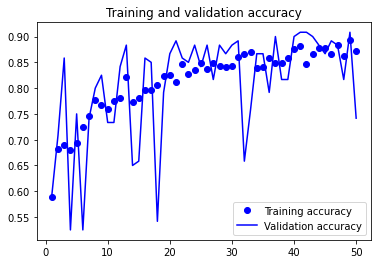

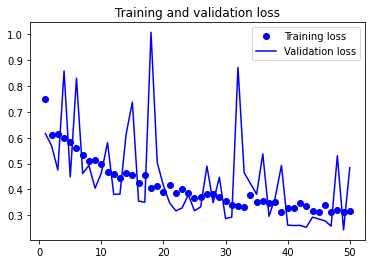

In [88]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [89]:
model4_2 = keras.models.load_model("fine_tuning_model4_new2.keras")

test_loss, test_acc = model4_2.evaluate(test_generator)

print(f"Test accuracy: {test_acc:.3f}")

78/78 [==============================] - 7s 88ms/step - loss: 0.4073 - accuracy: 0.8125
Test accuracy: 0.812


In [90]:
model4_2.save(r"F:\data for final project sem3\results\overfit model\vgg16 with finetune proper")

INFO:tensorflow:Assets written to: F:\data for final project sem3\results\overfit model\vgg16 with finetune proper\assets


## model 5

In [2]:
DATASET_DIR = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp3 copy\train"

In [3]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 15
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
new_base_dir = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp3 copy/test"
train_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(new_base_dir,
                                                   target_size=(IMG_H, IMG_W),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 624 images belonging to 2 classes.


In [5]:
inputs = keras.Input(shape=INPUT_SHAPE)
x = inputs
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model5 = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model5.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_model5_2_new_metrics.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [8]:
history = model5.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=callbacks)

Epoch 1/15
100/100 [==============================] - 43s 377ms/step - loss: 0.6988 - accuracy: 0.4969 - true_positives_1: 765.0000 - true_negatives_1: 30.0000 - val_loss: 0.6740 - val_accuracy: 0.5000 - val_true_positives_1: 200.0000 - val_true_negatives_1: 0.0000e+00
Epoch 2/15
100/100 [==============================] - 33s 325ms/step - loss: 0.6319 - accuracy: 0.7269 - true_positives_1: 746.0000 - true_negatives_1: 417.0000 - val_loss: 0.6167 - val_accuracy: 0.8450 - val_true_positives_1: 149.0000 - val_true_negatives_1: 189.0000
Epoch 3/15
100/100 [==============================] - 32s 323ms/step - loss: 0.5843 - accuracy: 0.8769 - true_positives_1: 709.0000 - true_negatives_1: 694.0000 - val_loss: 0.5728 - val_accuracy: 0.8775 - val_true_positives_1: 166.0000 - val_true_negatives_1: 185.0000
Epoch 4/15
100/100 [==============================] - 31s 314ms/step - loss: 0.5484 - accuracy: 0.8938 - true_positives_1: 708.0000 - true_negatives_1: 722.0000 - val_loss: 0.5408 - val_accura

In [11]:
#model5 = keras.models.load_model("fine_tuning_model5.keras")
model5 = keras.models.load_model("fine_tuning_model5_2_newmetrics.keras")

test_loss, test_acc = model5.evaluate(test_generator)

print(f"Test accuracy: {test_acc:.3f}")

39/39 [==============================] - 11s 269ms/step - loss: 0.5357 - accuracy: 0.7676 - true_positives_1: 381.0000 - true_negatives_1: 98.0000


ValueError: too many values to unpack (expected 2)